In [65]:
import math
import numpy
import pandas as pd

In [66]:
epsSEC = 10**-10

QBER = 0.0439
epsCOR = 10**-10
#q=1

In [67]:
#df = pd.read_csv("fvals_new.csv")
df = pd.read_csv("Default_elevation_sweep.csv")


In [68]:
df

,Unnamed: 0,max_elev,QBER,sifted_key,total_coincidence,pass_duration
0,0,31,0.055954,4812.0,9660.0,57.5
1,1,32,0.055954,6569.5,13188.0,78.5
2,2,33,0.051203,8411.5,16877.0,94.5
3,3,34,0.049566,9692.0,19443.0,106.5
4,4,35,0.048783,10716.5,21497.0,116.5
5,5,36,0.046041,13531.0,27029.5,125.5
6,6,37,0.045212,14978.5,29888.5,132.5
7,7,38,0.044729,16217.5,32340.5,139.5
8,8,39,0.043779,18874.5,37727.0,144.5
9,9,40,0.043394,20612.0,41225.0,150.5


In [69]:
N=10000000000
math.sqrt(N)

100000.0

In [70]:
k = 10000
n = N - k
leakEC = 4980 * (n/10240)

In [124]:
term1 = (n+k)/(n*k)
term2 = (k+1)/k
term3 = math.log(2/epsSEC)
interm = term1*term2*term3
mu = math.sqrt(interm)
mu

0.04870461346905977

In [72]:
def h(p):
    if p == 1: return 0
    if p == 0: return 0
    return -p*math.log2(p)-(1-p)*math.log2(1-p)

In [73]:
error_term = math.log(2/(epsSEC*epsSEC*epsCOR))

In [74]:
#q-h(Qtol+mu)

In [97]:
#secret Key length
#l = n*(q-h(Qtol+mu) ) - leakEC -error_term 
#l


NameError: name 'beta' is not defined

In [165]:
def compute_l(N,beta,qber,f): 
    q=1
    Qtol = qber
    k = beta*N
    n = N - k
    #print ("k",k,"n",n)
    term1 = (n+k)/(n*k)
    term2 = (k+1)/k
    term3 = math.log(2/epsSEC)
    interm = term1*term2*term3
    mu = math.sqrt(interm)
    error_term = math.log2(2/(epsSEC*epsSEC*epsCOR))
    leakEC = f*n*h(qber)
    #print ("mu",mu)
    if (Qtol+mu >0.11 or Qtol+mu <0 ):
        
        return 0
    else:
        #print("here good mu",mu)
        l = n*(q-h(Qtol+mu) ) - leakEC -error_term 
        return l


In [166]:
#compute_l(93734,0.10,0.0439)

In [167]:
beta_vals = numpy.linspace(0.0005005,.5,500)

In [178]:
def optimize(N,beta_vals,qber,f):
    max_l = 0
    for beta in beta_vals:
        #print ("beta",beta)
        r = f * h(qber)
        l = compute_l(N,beta,qber,f)
        if max_l < l:
            #print("here",l)
            max_l = l
            #print ("maxl",int(max_l))
    #if max_l <=0:
    #    return float('NaN')
    #else:
    return max_l

In [179]:
optimize(4812,beta_vals,0.055954,f=1.18)

0

In [180]:
#################

In [192]:
l_vals = []
for index, row in df.iterrows():
    N = float(row['sifted_key'])
    qber=float(row["QBER"])
    #f=float(row["fvals"])
    #print ( N,qber,f)
    l = optimize(N=N,beta_vals=beta_vals,qber=qber,f=1.18)
    #print (index)
    l_vals.append(l/1000)
    #print (l)

In [193]:
l_vals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.42037248669303,
 3.1415300007118994,
 3.7467338811366906,
 4.1377651056782625,
 4.461486007119244,
 4.81142592535259,
 5.429112761242055,
 5.831263299503157,
 6.16667110308558,
 6.449340123792866,
 6.723249838102283,
 7.672974641523263,
 8.17477759077829,
 8.637543136245567,
 8.982016891132552,
 9.307393693616987,
 9.62445982994611,
 10.403259399174912,
 11.024284180587763,
 11.480625808674642,
 11.883297636845525,
 12.219595260897979,
 12.547881143821456,
 12.810956660534371,
 13.078406679188392,
 13.344174109857624,
 14.17293832883079,
 14.865520702117138,
 15.36128309985103,
 15.735129983966486,
 16.083900186838598,
 16.37156625755998,
 16.64801114075255,
 16.90041696719739,
 17.098514828967623,
 17.32242882613033,
 17.46323579344553,
 17.67286016539955,
 17.804782036582928,
 17.929305851060256,
 17.994467944989136,
 18.156380683838,
 18.208317089897847,
 18.333178166816797,
 18.376330655111165,
 18.55154791290955,
 18.7

In [194]:
df["finite_key_old"] = l_vals

In [195]:
df.to_csv("CQT_sat_old_analyis.csv")


In [196]:
df2 = pd.read_csv("Default_FiniteKey.csv")

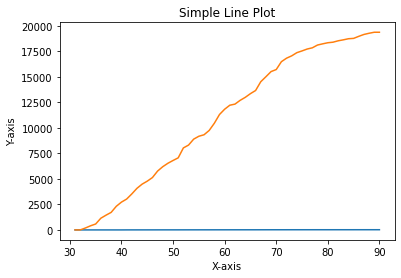

In [197]:
import matplotlib.pyplot as plt
x = df["max_elev"]

y = df["finite_key_old"]
y2 = df2["FiniteKey"]

# Create a simple line plot
plt.plot(x, y)
plt.plot(x,y2)
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')

# Show the plot
plt.show()

In [202]:
df3 = pd.read_csv("Figure_3_data.csv")

In [203]:
df3["SecretKey_old_analysis"] = l_vals

In [205]:
df3

,max_elev,SecretKey_default,SecretKey_1dB,SecretKey_2dB,SecretKey_3dB,SecretKey_4dB,SecretKey_old_analysis
0,31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,33,0.186565,0.000000,0.000000,0.000000,0.000000,0.000000
3,34,0.402265,0.059901,0.002989,0.000000,0.000000,0.000000
4,35,0.579917,0.134922,0.053160,0.048133,0.000000,0.000000
5,36,1.145601,0.425781,0.155290,0.085322,0.013359,0.000000
6,37,1.443109,0.590555,0.188495,0.131048,0.066575,0.000000
7,38,1.717227,0.719390,0.190074,0.159501,0.121014,0.000000
8,39,2.314876,1.178932,0.522207,0.187820,0.154119,0.000000
9,40,2.724701,1.458808,0.664060,0.298197,0.180239,0.000000


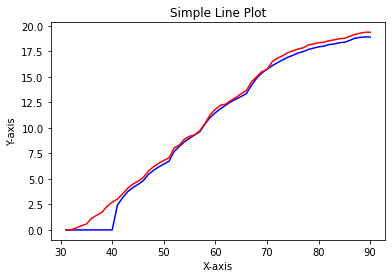

In [210]:
import matplotlib.pyplot as plt
x = df3["max_elev"]

y = df3["SecretKey_old_analysis"]
y2 = df3["SecretKey_default"]

# Create a simple line plot
plt.plot(x, y,c="blue")
plt.plot(x,y2,c="red")
# Add labels and title
plt.xlabel('X-axis',)
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')

# Show the plot
plt.show()

In [211]:
df3.to_csv("Figure_3_new_data.csv")